In [1]:
%%bash
nrnivmodl

/usr/bin/xcrun
/Users/anatolii-sorokin/Documents/Projects/neuron-model/mine
Mod files: "./h.mod" "./kadist.mod" "./kaprox.mod" "./kdrca1.mod" "./km.mod" "./na3n.mod" "./naxn.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created arm64/special


In [2]:
# Download NEURON: http://www.neuron.yale.edu/neuron/download
# Download PyNeuronToolbox: https://github.com/ahwillia/PyNeuron-Toolbox

from neuron import h
import numpy as np
import pylab as plt
import scipy.linalg
from PyNeuronToolbox.record import ez_record,ez_convert
from PyNeuronToolbox.morphology import shapeplot,shapeplot_animate
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
from matplotlib import animation
from matplotlib.pyplot import cm
%matplotlib inline
np.random.seed(123456789)

# Load morphology and other stuff
# --> SegLists: soma[2], dend[74], dend_5[37], apic[42], axon[1]
# --> Files from Migliore & Migliore (2012)
# --> CA1 pyramidal neuron
h.load_file('stdrun.hoc')
h.xopen('ri06.hoc')
h.xopen('fixnseg.hoc')
h.xopen('5a_nogui.hoc')
h.tstop = 700.0

	0 
total # of segments (50Hz): 742   max path distance: 853.32493 
apical 0  dend_5[0]
apical 1  dend_5[15]
apical 2  dend_5[14]
apical 3  dend_5[13]
apical 4  dend_5[12]
apical 5  dend_5[12]
apical 6  dend_5[12]
apical 7  dend_5[12]
apical 8  dend_5[12]
apical 9  dend_5[12]
apical 10  dend_5[12]
apical 11  dend_5[11]
apical 12  dend_5[11]
apical 13  dend_5[11]
apical 14  dend_5[10]
apical 15  dend_5[9]
apical 16  dend_5[8]
apical 17  dend_5[8]
apical 18  dend_5[8]
apical 19  dend_5[7]
apical 20  dend_5[6]
apical 21  dend_5[5]
apical 22  dend_5[5]
apical 23  dend_5[5]
apical 24  dend_5[5]
apical 25  dend_5[5]
apical 26  dend_5[5]
apical 27  dend_5[5]
apical 28  dend_5[4]
apical 29  dend_5[4]
apical 30  dend_5[4]
apical 31  dend_5[3]
apical 32  dend_5[2]
apical 33  dend_5[2]
apical 34  dend_5[2]
apical 35  dend_5[2]
apical 36  dend_5[2]
apical 37  dend_5[2]
apical 38  dend_5[2]
apical 39  dend_5[1]
apical 40  dend_5[1]
apical 41  dend_5[1]
#1


In [3]:
from PyNeuronToolbox.morphology import dist_between,allsec_preorder

def dist_to_soma(segment):
    return dist_between(h,h.soma[0](0.5),segment)

#seglist in pre-order
sec_list = allsec_preorder(h)
seg_list = []
for sec in sec_list:
    locs = np.linspace(0,1,sec.nseg+2)[1:-1]
    for loc in locs:
        seg_list.append(sec(loc))
n = len(seg_list)

In [4]:
for i in range(len(sec_list)):
    sec = sec_list[i]
    print(f"{i}: {sec.name()}, nseg={sec.nseg}, L={sec.L}, or={sec.orientation()}, hname={sec.hname()}")

0: soma[0], nseg=1, L=15.166100084781647, or=0.0, hname=soma[0]
1: soma[1], nseg=1, L=10.883900105953217, or=0.0, hname=soma[1]
2: dend_5[0], nseg=1, L=27.29313676464808, or=0.0, hname=dend_5[0]
3: apic[0], nseg=9, L=147.93433051396065, or=0.0, hname=apic[0]
4: dend_5[1], nseg=3, L=57.45149110486393, or=0.0, hname=dend_5[1]
5: apic[39], nseg=1, L=23.29171407802628, or=0.0, hname=apic[39]
6: apic[41], nseg=3, L=34.922839435595144, or=0.0, hname=apic[41]
7: apic[40], nseg=5, L=52.39168693889804, or=0.0, hname=apic[40]
8: dend_5[2], nseg=1, L=21.183727600433784, or=0.0, hname=dend_5[2]
9: apic[32], nseg=1, L=12.617619533060896, or=0.0, hname=apic[32]
10: apic[38], nseg=13, L=208.40219120020532, or=0.0, hname=apic[38]
11: apic[33], nseg=1, L=9.679981164937955, or=0.0, hname=apic[33]
12: apic[37], nseg=3, L=32.69642802210867, or=0.0, hname=apic[37]
13: apic[34], nseg=1, L=6.683028121429655, or=0.0, hname=apic[34]
14: apic[36], nseg=5, L=58.600785345533666, or=0.0, hname=apic[36]
15: apic[35

In [5]:
(dist_to_soma(sec(0)),dist_to_soma(sec(1)),sec.L,np.linspace(0,1,sec.nseg+2),np.linspace(0,1,sec.nseg+2)[1:-1])

(7.583050042390823,
 104.674267724172,
 97.09121768178117,
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333]))

In [6]:
dts = [dist_to_soma(s) for s in seg_list]
dts[:11]

[0.0,
 13.025000095367432,
 32.11351853066808,
 53.97866083043438,
 70.41580866531889,
 86.8529565002034,
 103.29010433508793,
 119.72725216997245,
 136.164400004857,
 152.60154783974147,
 169.03869567462598]

In [7]:
import re
import pandas as pd
p = re.compile("^([^\\[]+)\\[.+")
tps = [p.sub("\\1",seg.sec.name()) for seg in seg_list]
pd.Series(tps).drop_duplicates().tolist()

['soma', 'dend_5', 'apic', 'dend', 'axon']

In [8]:
seg = seg_list[0]
(seg.node_index(),seg.x,seg.sec)

(0, 0.5, soma[0])

In [9]:
(n,min(dts),max(dts))

(742, 0.0, 853.4184395306225)

In [10]:
def sushi_system(a,b,c,d):
    """
    Returns a matrix A, such that dx/dt = A*x
    
    N = # of compartments
    A is (2N x 2N) matrix
    x is (2N x 1) vector.
      The first N elements correspond to concentrations of u (molecules in transit)
      The second half correspond to concentrations of u-star (active molecules)
    The trafficking rate constants along the microtubules are given by the vectors "a" and "b"
    The rate constants for u turning into u* is given by the vector "c"
    The rate constants for the degradation of u* is given by the vector "d"
    """
    # number of compartments
    N = len(d)
    
    ## State-space equations
    #  dx/dt = Ax + Bu
    A = np.zeros((2*N,2*N))

    # Trafficking along belt
    # Iterative traversal of dendritic tree in pre-order
    i = 0
    section = None
    parentStack = [(None,h.soma[0])]
    while len(parentStack)>0:
        # Get next section to traverse
        #  --> p is parent index, section is h.Section object
        (p,section) = parentStack.pop()
        
        # Trafficking to/from parent
        if p is not None:
            # Out of parent, into child
            ai = a.pop()
            A[p,p] += -ai
            A[i,p] += ai
            # Into parent, out of child
            bi = b.pop()
            A[p,i] += bi
            A[i,i] += -bi
        
        # visit all segments in compartment
        for (j,seg) in enumerate(section):
            # Deal with out/into rates within compartment, just tridiag matrix
            if j>0:
                # Out of parent, into child
                ai = a.pop()
                A[i-1,i-1] += -ai
                A[i,i-1] += ai
                # Into parent, out of child
                bi = b.pop()
                A[i-1,i] += bi
                A[i,i] += -bi
            # move onto next compartment
            i += 1
        
        # now visit children in pre-order
        child_list = list(h.SectionRef(sec=section).child)
        if child_list is not None:
            child_list.reverse()
        for c_sec in child_list:
            parentStack.append([i-1,c_sec]) # append parent index and child
    
    # Trafficking off the belt
    for i in range(N):
        A[i,i] += -c[i]
        A[i+N,i] += c[i]

    # Degradation after being taken off the belt
    for i in range(N):
        A[i+N,i+N] = -d[i]
    
    return A

In [11]:
def trafficking_solution(utarg):
    """ Solve the problem by tuning trafficking rates, like Figs 1 and 2. """
    x = []
    
    # Iterative traversal of dendritic tree in pre-order
    i = 0
    section = None
    parentStack = [(None,h.soma[0])]
    while len(parentStack)>0:
        # Get next section to traverse
        #  --> p is parent index, section is h.Section object
        (p,section) = parentStack.pop()
        
        # Trafficking to/from parent
        if p is not None:
            mp = utarg[p] # concentration in parent
            mc = utarg[i] # concentration in child
            x.insert(0,mp/mc)
        
        # visit all segments in compartment
        for (j,seg) in enumerate(section):
            # Deal with out/into rates within compartment, just tridiag matrix
            if j>0:
                mp = utarg[i-1]
                mc = utarg[i]
                x.insert(0,mp/mc)
                
            # move onto next compartment
            i += 1
        
        # now visit children in pre-order
        child_list = list(h.SectionRef(sec=section).child)
        if child_list is not None:
            child_list.reverse()
        for c_sec in child_list:
            parentStack.append([i-1,c_sec]) # append parent index and child
    
    # return calculated guesses (flip, up/down since get_deriv pops from start)
    return np.array(x)

def get_sys_matrix(utarg,F=0.5,Ctau=1e-3,dv=1e-7):
    # F is a mixing factor between 0 and 1
    K = np.sum(utarg)/n
    x = trafficking_solution(F*utarg + (1-F)*K)
    a = (1/(1+x))
    a = list(a)
    b = list((1/(1+x**-1)))
    d = list(np.ones(n)*dv)
    c = list(Ctau*utarg/(F*utarg + (1-F)*K))
    A = sushi_system(a,b,c,d)
    return A

In [12]:
# matrix exponential used to solve linear system
from scipy.linalg import expm

# initial condition, u starts only in soma and is trafficked out to dendrites
u0 = np.zeros(2*n)
u0[0] = 1.0  # compartment 0 is the soma

In [13]:
utarg = np.ones(len(seg_list))
utarg[260:393] *= 10
utarg[393:] *= 0.1 # no trafficking to basal dend
utarg /= np.sum(utarg)
F=0.5
Ctau=1e-3
dv=1e-7
K = np.sum(utarg)/n
x = trafficking_solution(F*utarg + (1-F)*K)
a = (1/(1+x))
a = list(a)
b = list((1/(1+x**-1)))
d = list(np.ones(n)*dv)
c = list(Ctau*utarg/(F*utarg + (1-F)*K))
A = sushi_system(a,b,c,d)
(x.shape, A.shape[0]/2)

((741,), 742.0)

In [14]:
N = len(d)
An = np.zeros((2*N,2*N))
(N, len(a),len(b),len(c),An.shape,x.shape, (1/(1+x)).shape)

(742, 0, 0, 742, (1484, 1484), (741,), (741,))

In [15]:
a = (1/(1+x))
a = list(a)
aZ = []
(len(a),a.pop(),len(a),a.pop())

(741, 0.5, 740, 0.5)

In [16]:
def solve_u(w,V,Vinv,t):
    D = np.diag(np.exp(w*t))          # diagonal matrix exponential
    PHI = np.real(V.dot(D.dot(Vinv))) # state transition matrix
    return PHI.dot(u0)                # calculate u(t)

def run_sim(A,nframes=10):
    # Run a simulation (log time)
    # --> this is a linear system; thus, matrix exponential provides exact solution
    utrace = [u0]
    t = np.logspace(-0.5,8.5,nframes)
    w,V = scipy.linalg.eig(A)
    Vinv = np.linalg.inv(V)
    t = np.logspace(-0.5,8.5,nframes)
    for t_ in t: utrace.append(solve_u(w,V,Vinv,t_))
    return np.array(utrace).T

def animate_sim(climits=[0,0.0035]):
    u = utrace[n:,:]
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('distribution of active/detached cargo',fontweight='bold',fontsize=14)
    plt.axis('off')

    # Hack to get a colorbar
    # http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(climits[0],climits[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm)
    plt.tight_layout()

    anim_func = shapeplot_animate(u.T,lines,u.shape[1],clim=climits,cmap=cm.cool)
    return animation.FuncAnimation(fig, anim_func, frames=u.shape[1], interval=5e2, blit=True)

def snap_ss(name,clim=[0,0.0035],cmap=plt.cm.cool):
    u = utrace[n:,:]
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=u[:,-1],clim=clim,\
                      cmap=cmap,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('steady-state',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(name+'.svg')

In [17]:
[int(i / 37) for i in range(n)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [18]:
utrace = [u0]
clr = [int(i / 37) for i in range(n)]
utrace.append(np.array(clr+clr))
utrace = np.array(utrace).T
utrace.shape

(1484, 2)

Text(0, 0.5, 'Segment group')

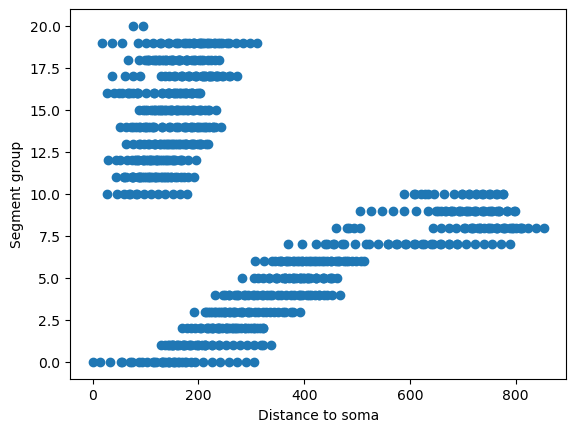

In [19]:
fig, ax = plt.subplots()
ax.scatter(dts,clr)
ax.set_xlabel('Distance to soma')
ax.set_ylabel('Segment group')

In [20]:
from PyNeuronToolbox.morphology import get_section_path, interpolate_jagged
x=[]
y=[]
z=[]
i=0
for sec in sec_list:
    xyz = get_section_path(h,sec)
    seg_paths = interpolate_jagged(xyz,sec.nseg)
    for (j,path) in enumerate(seg_paths):
        x.append(path[0,0])
        y.append(path[0,1])
        z.append(path[0,2])
        i += 1
    
(i,(min(x),max(x)),(min(y),max(y)),(min(z),max(z)))

(742,
 (-130.58949984184136, 290.6743215619983),
 (-164.68162633922978, 600.3692015504528),
 (-49.96985061545046, 29.085774799806913))

In [21]:
#bins=np.array([-165,-127.5,-90,-52.5,-15,10,52.14285714,94.28571429,136.4285714,178.5714286,220.7142857,262.8571429,305,347.1428571,389.2857143,431.4285714,473.5714286,515.7142857,557.8571429,600])
bins=np.array([-127.5,-90,-52.5,-10,5,52.14285714,94.28571429,136.4285714,178.5714286,220.7142857,262.8571429,305,347.1428571,389.2857143,431.4285714,473.5714286,515.7142857,557.8571429])
result = np.digitize(np.array(y), bins)
(len(result),len(bins),result)

(742,
 18,
 array([ 4,  4,  5,  5,  5,  6,  5,  6,  6,  6,  5,  5,  5,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,
         9,  9, 10, 10, 10,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
         7,  7,  7,  7,  7,  8,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10,  8,
         8,  8,  9,  9,  9,  9, 10, 10, 10,  9,  9,  9,  9,  9,  8,  8,  8,
         9,  9,  9,  8,  8,  8,  8,  8,  9,  8,  9,  8,  8,  8,  8,  8,  7,
         7,  7,  7,  8,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12,
        12,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12,  9,  9,  9, 10,
        10, 10, 11, 11, 11, 12, 12, 12, 12, 13,  9,  9, 10, 10, 10, 11, 11,
        11, 12, 12, 12, 12, 13, 11, 11, 12, 12, 12, 13, 13,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 10, 11, 11, 11, 11, 12,
 

In [22]:
(min(result),max(result),len(np.concatenate([result,result])))

(0, 18, 1484)

In [23]:
utrace = [u0]
utrace.append(np.concatenate([result,result]))
utrace = np.array(utrace).T
utrace.shape

(1484, 2)

In [24]:
result[:11]

array([4, 4, 5, 5, 5, 6, 5, 6, 6, 6, 5])

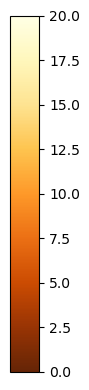

In [25]:
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrBr_r, norm=plt.Normalize(0,20)) 
#plt.colorbar(sm)
fig, ax = plt.subplots(figsize=(1, 4))
# vmin, vmax =  np.nanmin(A), np.nanmax(A)
cbar = fig.colorbar(sm, ax)
plt.tight_layout()
plt.show()

In [26]:
(seg_list[:3],x[:3],y[:3],z[:3])

([soma[0](0.5), soma[1](0.5), dend_5[0](0.5)],
 [0.0, 0.0, 0.0],
 [-0.5038999915122986, -0.5038999915122986, 10.380000114440918],
 [0.0, 0.0, 0.0])

In [27]:
sec=sec_list[0]
xyz0 = get_section_path(h,sec)
seg_paths0 = interpolate_jagged(xyz0,sec.nseg)
sec=sec_list[1]
xyz1 = get_section_path(h,sec)
seg_paths1 = interpolate_jagged(xyz1,sec.nseg)
#(sec_list[:2],(xyz0,xyz1),(seg_paths0,seg_paths1))

In [28]:
import math
xS=[-5.68000019e-01, -1.00000000e+00, -2.30000000e-02] 
xE=[-8.50000000e+00,  6.05000000e+01,  4.45000000e+01]
sqd=[(xS[i]-xE[i]) ** 2 for i in range(len(xS))]
(sqd, sum(sqd), math.sqrt(sum(sqd)))

([62.916623698584, 3782.25, 1982.2975290000004],
 5827.464152698584,
 76.33782910653528)

In [29]:
(sec,sec.nseg,sec.L)

(soma[1], 1, 10.883900105953217)

(-159.46999740600586,
 319.4700126647949,
 -216.75999298095704,
 649.1599868774414,
 -54.54999923706055,
 44.5)

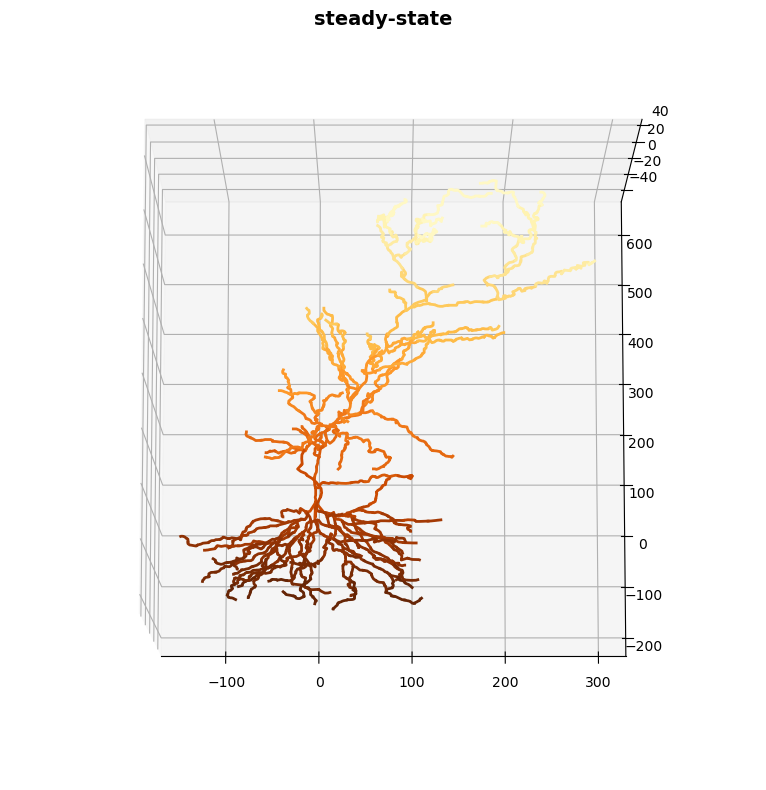

In [30]:
# snapshot of steady-state
snap_ss('1b',clim=[0,20],cmap=plt.cm.YlOrBr_r)
plt.axis('on')

In [31]:
(len(result),min(result),max(result),min(dts),max(dts))

(742, 0, 18, 0.0, 853.4184395306225)

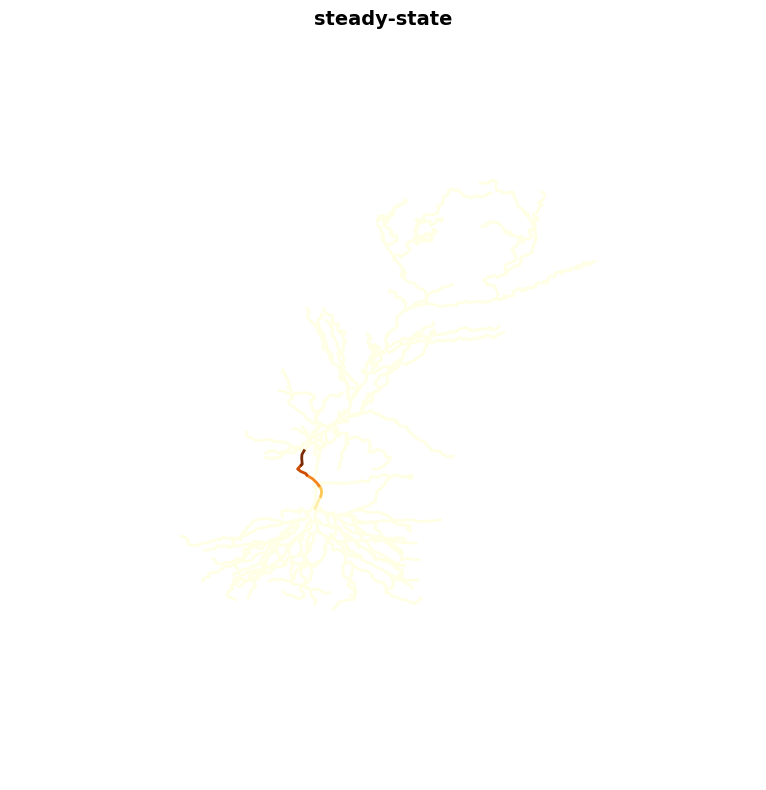

In [32]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=-1*np.ones(2*n)
ddd=[]
for i in range(n):
    if 'axon' == tps[i]:
        u1[i+n] = dts[i]
        u1[i]= dts[i]
        ddd.append(dts[i])

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('D2Soma_axon',clim=[0,100],cmap=plt.cm.YlOrBr)

In [33]:
(min(u1),max(u1),min(ddd),max(ddd))

(-1.0, 94.96514595599388, 17.29217181056894, 94.96514595599388)

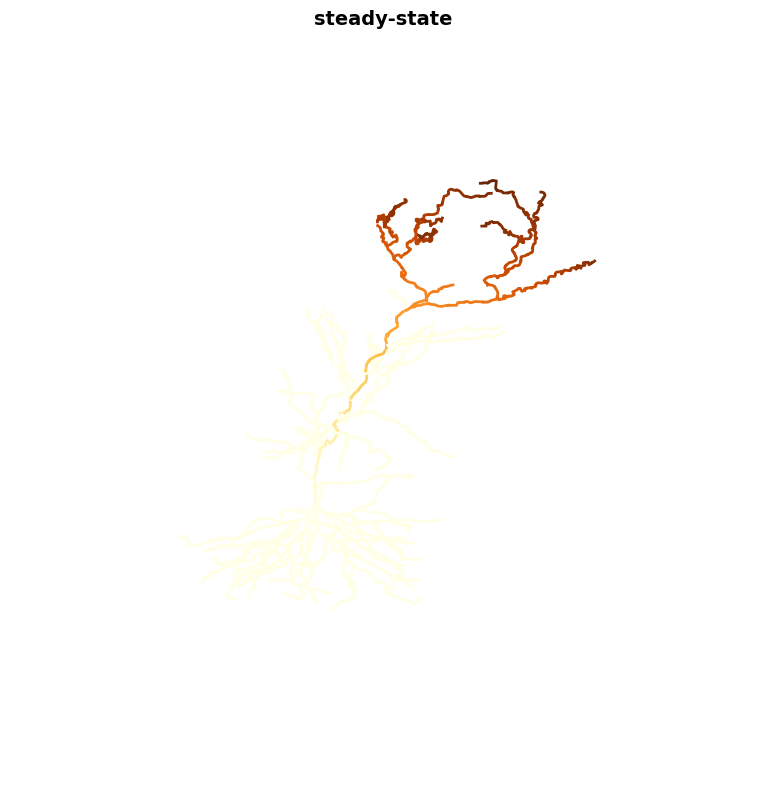

In [34]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=-1*np.ones(2*n)
ddd=[]
for i in range(n):
    if 'dend_5' == tps[i]:
        u1[i+n] = dts[i]
        u1[i]= dts[i]
        ddd.append(dts[i])

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('D2Soma_dend_5',clim=[0,854],cmap=plt.cm.YlOrBr)

In [35]:
(min(u1),max(u1),min(ddd),max(ddd))

(-1.0, 853.4184395306225, 32.11351853066808, 853.4184395306225)

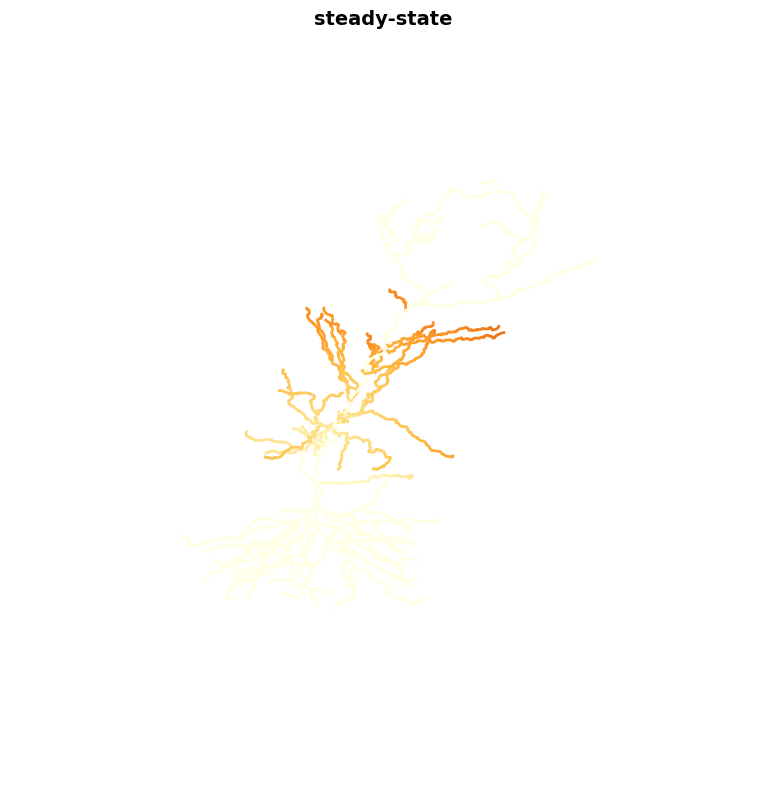

In [36]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=np.zeros(2*n)
ddd=[]
for i in range(n):
    if 'apic' == tps[i]:
        u1[i+n] = dts[i]
        u1[i]= dts[i]
        ddd.append(dts[i])

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('D2Soma_apic',clim=[0,854],cmap=plt.cm.YlOrBr)

In [37]:
(min(u1),max(u1),min(ddd),max(ddd))

(0.0, 522.4010522694794, 53.97866083043438, 522.4010522694794)

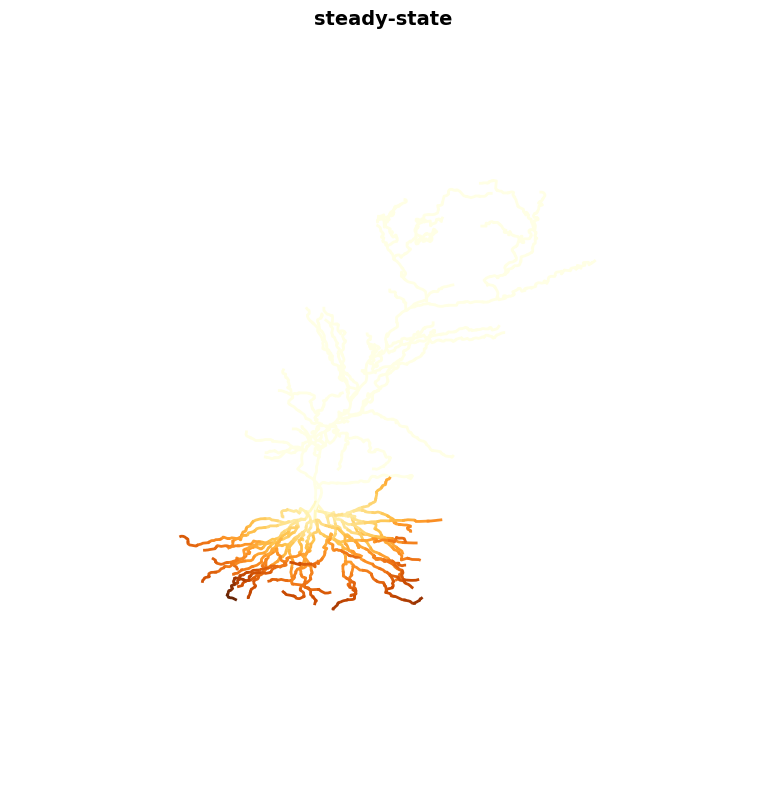

In [38]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
ddd=[]
u1=np.zeros(2*n)
for i in range(n):
    if 'dend' == tps[i]:
        u1[i+n] = dts[i]
        u1[i]= dts[i]
        ddd.append(dts[i])

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('D2Soma_dend',clim=[0,312],cmap=plt.cm.YlOrBr)

In [39]:
(min(u1),max(u1),min(ddd),max(ddd))

(0.0, 311.5534165598217, 25.923566565212937, 311.5534165598217)

In [40]:
bins_down=np.array([62,124,186,248,312])
bins_up=np.array([0,57,114,171,228,285,342,399,456,513,570,627,684,741,798,855])
idb_up=np.digitize(np.array(dts), bins_up)
idb_down=np.digitize(np.array(dts), bins_down)
y=[25.923566565212937, 311.5534165598217,313]
(np.digitize(np.array(y), bins_down),
 np.digitize(np.array(y), bins_up),
 np.digitize(np.array([512]), bins_up)[0],
 idb_up[:11],idb_down[:11],dts[:11],
 np.histogram(idb_down,bins=range(6)),np.histogram([idb_down[i] for i in range(n) if 'dend' == tps[i]],bins=range(7)),
 {0:len([i for i in range(n) if idb_down[i]==0 and 'dend' == tps[i]]),
  1:len([i for i in range(n) if idb_down[i]==1 and 'dend' == tps[i]]),
  2:len([i for i in range(n) if idb_down[i]==2 and 'dend' == tps[i]]),
  3:len([i for i in range(n) if idb_down[i]==3 and 'dend' == tps[i]]),
  4:len([i for i in range(n) if idb_down[i]==4 and 'dend' == tps[i]])},
[dts[i] for i in range(n) if dts[i]>310 and 'dend' == tps[i]],
[dts[i] for i in range(n) if dts[i]>798 ])


(array([0, 4, 5]),
 array([1, 6, 6]),
 9,
 array([1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]),
 [0.0,
  13.025000095367432,
  32.11351853066808,
  53.97866083043438,
  70.41580866531889,
  86.8529565002034,
  103.29010433508793,
  119.72725216997245,
  136.164400004857,
  152.60154783974147,
  169.03869567462598],
 (array([ 24, 110, 169, 129, 310]), array([0, 1, 2, 3, 4, 5])),
 (array([ 16, 100, 134,  85,   9,   0]), array([0, 1, 2, 3, 4, 5, 6])),
 {0: 16, 1: 100, 2: 134, 3: 85, 4: 9},
 [311.5534165598217],
 [808.4811808753591,
  823.4602670937802,
  838.4393533122014,
  853.4184395306225,
  810.3528399646885,
  801.0471405716,
  813.1168099898664,
  798.0040178084187,
  799.746662060049])

In [41]:
idCA1=-1*np.ones(n, dtype=int)
lblCA1=['' for i in range(n)]
abbCA1=['' for i in range(n)]
for i in range(n):
    if 'dend' == tps[i]:
        idb = int(idb_down[i])
        idCA1[i] = abs(idb - 4)
        lblCA1[i]=f"CA1so{idb}"#:{i}"
        abbCA1[i]=f"CA1so_{1+idCA1[i]}"#:{i}"
    elif 'apic' == tps[i]:
        idb = int(idb_up[i])
        idCA1[i] = idb + 4
        lblCA1[i]=f"CA1sr{idb}"#:{i}"
        abbCA1[i]=f"CA1sr_{idb}"#:{i}"
    elif 'dend_5' == tps[i]:
        idb = int(idb_up[i])
        idCA1[i] = idb + 4
        lblCA1[i]=f"CA1slm{idb}"#:{i}"
        if idCA1[i] > 14 :
            abbCA1[i]=f"CA1slm_{idb-10}"#:{i}"
        else:
            abbCA1[i]=f"CA1sr_{idb}"#:{i}"
            
(min(idCA1),max(idCA1))


(-1, 19)

In [42]:
abbT={}
for i in range(n):
    abbT[abbCA1[i]] = 1+ abbT.get(abbCA1[i],0)
(np.histogram(idCA1,bins=[i-1 for i in range(22)]),
 [i for i in range(len(idCA1)) if idCA1[i]<0],
 [tps[i] for i in range(len(idCA1)) if idCA1[i]<0],
abbT)

((array([  7,   9,  85, 134, 100,  16,   3,   6,  29,  37,  48,  44,  46,
          38,  21,   9,  13,  24,  35,  29,   9]),
  array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20])),
 [0, 1, 737, 738, 739, 740, 741],
 ['soma', 'soma', 'axon', 'axon', 'axon', 'axon', 'axon'],
 {'': 7,
  'CA1sr_1': 3,
  'CA1sr_2': 6,
  'CA1sr_3': 29,
  'CA1sr_4': 37,
  'CA1sr_5': 48,
  'CA1sr_6': 44,
  'CA1sr_7': 46,
  'CA1sr_8': 38,
  'CA1sr_9': 21,
  'CA1sr_10': 9,
  'CA1slm_1': 13,
  'CA1slm_2': 24,
  'CA1slm_3': 35,
  'CA1slm_4': 29,
  'CA1slm_5': 9,
  'CA1so_5': 16,
  'CA1so_4': 100,
  'CA1so_3': 134,
  'CA1so_2': 85,
  'CA1so_1': 9})

In [43]:
binN=-1
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,0,soma,-1,1,0,,,0.000000
1,1,soma,-1,1,0,,,13.025000
2,737,axon,-1,1,0,,,17.292172
3,738,axon,-1,1,0,,,36.710415
4,739,axon,-1,1,0,,,56.128659
5,740,axon,-1,2,1,,,75.546902
6,741,axon,-1,2,1,,,94.965146


In [44]:
binN=0
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,651,dend,0,5,4,CA1so4,CA1so_1,259.862104
1,652,dend,0,5,4,CA1so4,CA1so_1,272.913319
2,661,dend,0,5,4,CA1so4,CA1so_1,258.251424
3,708,dend,0,5,4,CA1so4,CA1so_1,257.786286
4,709,dend,0,5,4,CA1so4,CA1so_1,271.228069
5,710,dend,0,5,4,CA1so4,CA1so_1,284.669852
6,711,dend,0,6,4,CA1so4,CA1so_1,298.111634
7,712,dend,0,6,4,CA1so4,CA1so_1,311.553417
8,717,dend,0,5,4,CA1so4,CA1so_1,253.721451


In [45]:
binN=4
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,393,dend,4,1,0,CA1so0,CA1so_5,27.730998
1,394,dend,4,1,0,CA1so0,CA1so_5,46.568792
2,395,dend,4,2,0,CA1so0,CA1so_5,59.477437
3,433,dend,4,1,0,CA1so0,CA1so_5,43.943708
4,434,dend,4,2,0,CA1so0,CA1so_5,58.430060
5,441,dend,4,2,0,CA1so0,CA1so_5,59.089730
6,466,dend,4,1,0,CA1so0,CA1so_5,29.513889
7,467,dend,4,1,0,CA1so0,CA1so_5,43.111788
8,468,dend,4,1,0,CA1so0,CA1so_5,50.625248
9,549,dend,4,1,0,CA1so0,CA1so_5,51.657230


In [46]:
binN=5
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,2,dend_5,5,1,0,CA1slm1,CA1sr_1,32.113519
1,3,apic,5,1,0,CA1sr1,CA1sr_1,53.978661
2,12,dend_5,5,1,0,CA1slm1,CA1sr_1,55.335335


In [47]:
binN=6
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,4,apic,6,2,1,CA1sr2,CA1sr_2,70.415809
1,5,apic,6,2,1,CA1sr2,CA1sr_2,86.852957
2,6,apic,6,2,1,CA1sr2,CA1sr_2,103.290104
3,13,dend_5,6,2,1,CA1slm2,CA1sr_2,74.485832
4,14,dend_5,6,2,1,CA1slm2,CA1sr_2,93.636330
5,24,dend_5,6,2,1,CA1slm2,CA1sr_2,113.803442


In [48]:
binN=7
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,7,apic,7,3,1,CA1sr3,CA1sr_3,119.727252
1,8,apic,7,3,2,CA1sr3,CA1sr_3,136.164400
2,9,apic,7,3,2,CA1sr3,CA1sr_3,152.601548
3,10,apic,7,3,2,CA1sr3,CA1sr_3,169.038696
4,15,apic,7,3,1,CA1sr3,CA1sr_3,114.857435
5,16,apic,7,3,2,CA1sr3,CA1sr_3,132.323765
6,17,apic,7,3,2,CA1sr3,CA1sr_3,143.964712
7,18,apic,7,3,2,CA1sr3,CA1sr_3,155.605658
8,19,apic,7,3,2,CA1sr3,CA1sr_3,131.742461
9,20,apic,7,3,2,CA1sr3,CA1sr_3,142.220798


In [49]:
binN=8
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,11,apic,8,4,2,CA1sr4,CA1sr_4,185.475844
1,23,apic,8,4,2,CA1sr4,CA1sr_4,173.655810
2,28,apic,8,4,2,CA1sr4,CA1sr_4,177.090270
3,29,apic,8,4,3,CA1sr4,CA1sr_4,193.121207
4,30,apic,8,4,3,CA1sr4,CA1sr_4,209.152145
5,31,apic,8,4,3,CA1sr4,CA1sr_4,225.183083
6,42,apic,8,4,2,CA1sr4,CA1sr_4,173.939930
7,46,apic,8,4,2,CA1sr4,CA1sr_4,182.676327
8,47,apic,8,4,3,CA1sr4,CA1sr_4,194.396484
9,48,apic,8,4,3,CA1sr4,CA1sr_4,206.116641


In [50]:
binN=14
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,247,apic,14,10,5,CA1sr10,CA1sr_10,513.916348
1,259,apic,14,10,5,CA1sr10,CA1sr_10,522.401052
2,270,dend_5,14,10,5,CA1slm10,CA1sr_10,517.959577
3,271,dend_5,14,10,5,CA1slm10,CA1sr_10,538.991816
4,272,dend_5,14,10,5,CA1slm10,CA1sr_10,557.771730
5,287,dend_5,14,10,5,CA1slm10,CA1sr_10,558.179311
6,334,dend_5,14,10,5,CA1slm10,CA1sr_10,526.145515
7,335,dend_5,14,10,5,CA1slm10,CA1sr_10,546.819088
8,336,dend_5,14,10,5,CA1slm10,CA1sr_10,567.492661


In [51]:
binN=15
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,273,dend_5,15,11,5,CA1slm11,CA1slm_1,574.299318
1,274,dend_5,15,11,5,CA1slm11,CA1slm_1,590.826907
2,275,dend_5,15,11,5,CA1slm11,CA1slm_1,607.354495
3,276,dend_5,15,11,5,CA1slm11,CA1slm_1,623.882083
4,288,dend_5,15,11,5,CA1slm11,CA1slm_1,575.522062
5,289,dend_5,15,11,5,CA1slm11,CA1slm_1,592.864813
6,290,dend_5,15,11,5,CA1slm11,CA1slm_1,610.207563
7,337,dend_5,15,11,5,CA1slm11,CA1slm_1,589.194190
8,338,dend_5,15,11,5,CA1slm11,CA1slm_1,611.923675
9,370,dend_5,15,11,5,CA1slm11,CA1slm_1,589.270884


In [52]:
binN=16
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,277,dend_5,16,12,5,CA1slm12,CA1slm_2,640.409672
1,278,dend_5,16,12,5,CA1slm12,CA1slm_2,656.937260
2,279,dend_5,16,12,5,CA1slm12,CA1slm_2,673.464848
3,291,dend_5,16,12,5,CA1slm12,CA1slm_2,627.550314
4,292,dend_5,16,12,5,CA1slm12,CA1slm_2,643.711232
5,293,dend_5,16,12,5,CA1slm12,CA1slm_2,658.690319
6,294,dend_5,16,12,5,CA1slm12,CA1slm_2,673.669405
7,307,dend_5,16,12,5,CA1slm12,CA1slm_2,643.651982
8,308,dend_5,16,12,5,CA1slm12,CA1slm_2,658.512569
9,309,dend_5,16,12,5,CA1slm12,CA1slm_2,673.373155


In [53]:
binN=17
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,280,dend_5,17,13,5,CA1slm13,CA1slm_3,689.992436
1,281,dend_5,17,13,5,CA1slm13,CA1slm_3,706.520025
2,282,dend_5,17,13,5,CA1slm13,CA1slm_3,723.047613
3,283,dend_5,17,13,5,CA1slm13,CA1slm_3,739.575201
4,295,dend_5,17,13,5,CA1slm13,CA1slm_3,688.648491
5,296,dend_5,17,13,5,CA1slm13,CA1slm_3,703.627577
6,297,dend_5,17,13,5,CA1slm13,CA1slm_3,718.606664
7,298,dend_5,17,13,5,CA1slm13,CA1slm_3,733.585750
8,310,dend_5,17,13,5,CA1slm13,CA1slm_3,688.233741
9,311,dend_5,17,13,5,CA1slm13,CA1slm_3,703.094327


In [54]:
binN=18
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,284,dend_5,18,14,5,CA1slm14,CA1slm_4,756.102790
1,285,dend_5,18,14,5,CA1slm14,CA1slm_4,772.630378
2,286,dend_5,18,14,5,CA1slm14,CA1slm_4,789.157966
3,299,dend_5,18,14,5,CA1slm14,CA1slm_4,748.564836
4,300,dend_5,18,14,5,CA1slm14,CA1slm_4,763.543922
5,301,dend_5,18,14,5,CA1slm14,CA1slm_4,778.523008
6,302,dend_5,18,14,5,CA1slm14,CA1slm_4,793.502095
7,314,dend_5,18,14,5,CA1slm14,CA1slm_4,748.920089
8,315,dend_5,18,14,5,CA1slm14,CA1slm_4,764.278277
9,316,dend_5,18,14,5,CA1slm14,CA1slm_4,779.636465


In [55]:
binN=19
pd.DataFrame({'N':[i for i in range(len(idCA1)) if idCA1[i]==binN],
              'Name': [tps[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'ID': [idCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinUp':[idb_up[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'BinDown':[idb_down[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'lbl': [lblCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'abb':[abbCA1[i] for i in range(len(idCA1)) if idCA1[i]== binN],
              'DtS':[dts[i] for i in range(len(idCA1)) if idCA1[i]== binN]})

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,303,dend_5,19,15,5,CA1slm15,CA1slm_5,808.481181
1,304,dend_5,19,15,5,CA1slm15,CA1slm_5,823.460267
2,305,dend_5,19,15,5,CA1slm15,CA1slm_5,838.439353
3,306,dend_5,19,15,5,CA1slm15,CA1slm_5,853.418440
4,318,dend_5,19,15,5,CA1slm15,CA1slm_5,810.352840
5,326,dend_5,19,15,5,CA1slm15,CA1slm_5,801.047141
6,327,dend_5,19,15,5,CA1slm15,CA1slm_5,813.116810
7,350,dend_5,19,15,5,CA1slm15,CA1slm_5,798.004018
8,362,dend_5,19,15,5,CA1slm15,CA1slm_5,799.746662


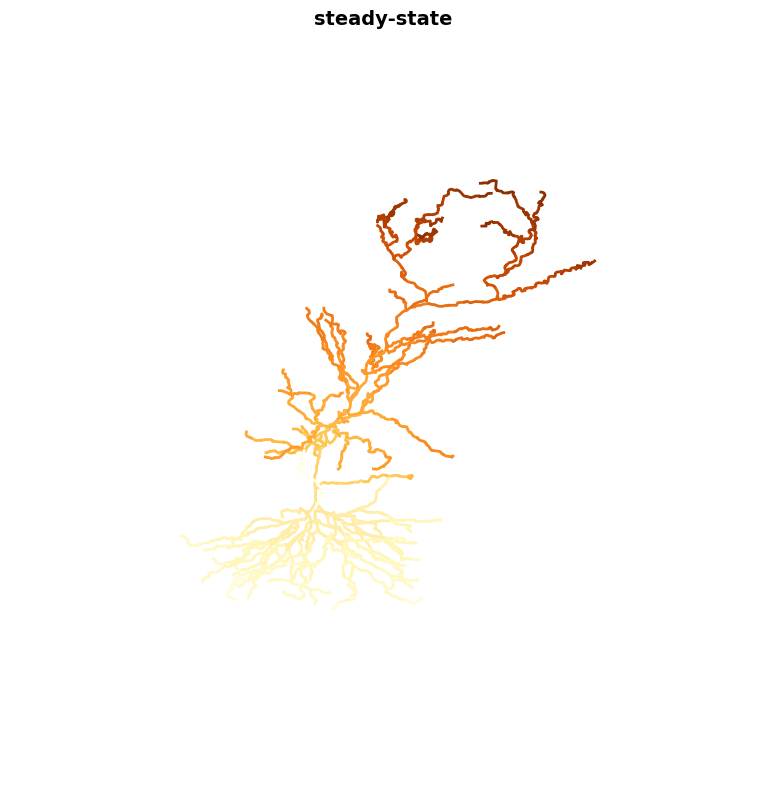

In [56]:
utrace = [u0]
utrace.append(np.concatenate([idCA1,idCA1]))
utrace = np.array(utrace).T
utrace.shape
snap_ss('CA1_grad_mapping',clim=[-1,21],cmap=plt.cm.YlOrBr)

In [57]:
segDF=pd.DataFrame({'N':[i for i in range(len(idCA1))],
              'Name': [tps[i] for i in range(len(idCA1))],
              'ID': [idCA1[i] for i in range(len(idCA1))],
              'BinUp':[idb_up[i] for i in range(len(idCA1))],
              'BinDown':[idb_down[i] for i in range(len(idCA1))],
              'lbl': [lblCA1[i] for i in range(len(idCA1))],
              'abb':[abbCA1[i] for i in range(len(idCA1))],
              'DtS':[dts[i] for i in range(len(idCA1))]})
segDF

,N,Name,ID,BinUp,BinDown,lbl,abb,DtS
0,0,soma,-1,1,0,,,0.000000
1,1,soma,-1,1,0,,,13.025000
2,2,dend_5,5,1,0,CA1slm1,CA1sr_1,32.113519
3,3,apic,5,1,0,CA1sr1,CA1sr_1,53.978661
4,4,apic,6,2,1,CA1sr2,CA1sr_2,70.415809
...,...,...,...,...,...,...,...,...
737,737,axon,-1,1,0,,,17.292172
738,738,axon,-1,1,0,,,36.710415
739,739,axon,-1,1,0,,,56.128659
740,740,axon,-1,2,1,,,75.546902


In [58]:
segDF.to_csv('seg_mapping.csv')

In [59]:
tdf=pd.read_csv('seg_mapping.csv')
abbCA1=tdf['abb']
abbT={}
segIdx={}
for i in range(n):
    abbT[abbCA1[i]] = 1+ abbT.get(abbCA1[i],0)
    ll=segIdx.get(abbCA1[i],[])
    ll.append(i)
    segIdx[abbCA1[i]] = ll

(abbCA1,abbT,segIdx.keys(),{k:len(segIdx.get(k)) for k in segIdx.keys()})

(0          NaN
 1          NaN
 2      CA1sr_1
 3      CA1sr_1
 4      CA1sr_2
         ...   
 737        NaN
 738        NaN
 739        NaN
 740        NaN
 741        NaN
 Name: abb, Length: 742, dtype: object,
 {nan: 7,
  'CA1sr_1': 3,
  'CA1sr_2': 6,
  'CA1sr_3': 29,
  'CA1sr_4': 37,
  'CA1sr_5': 48,
  'CA1sr_6': 44,
  'CA1sr_7': 46,
  'CA1sr_8': 38,
  'CA1sr_9': 21,
  'CA1sr_10': 9,
  'CA1slm_1': 13,
  'CA1slm_2': 24,
  'CA1slm_3': 35,
  'CA1slm_4': 29,
  'CA1slm_5': 9,
  'CA1so_5': 16,
  'CA1so_4': 100,
  'CA1so_3': 134,
  'CA1so_2': 85,
  'CA1so_1': 9},
 dict_keys([nan, 'CA1sr_1', 'CA1sr_2', 'CA1sr_3', 'CA1sr_4', 'CA1sr_5', 'CA1sr_6', 'CA1sr_7', 'CA1sr_8', 'CA1sr_9', 'CA1sr_10', 'CA1slm_1', 'CA1slm_2', 'CA1slm_3', 'CA1slm_4', 'CA1slm_5', 'CA1so_5', 'CA1so_4', 'CA1so_3', 'CA1so_2', 'CA1so_1']),
 {nan: 7,
  'CA1sr_1': 3,
  'CA1sr_2': 6,
  'CA1sr_3': 29,
  'CA1sr_4': 37,
  'CA1sr_5': 48,
  'CA1sr_6': 44,
  'CA1sr_7': 46,
  'CA1sr_8': 38,
  'CA1sr_9': 21,
  'CA1sr_10': 9,
  'CA1s

In [60]:
expD=pd.read_csv('data/CA1_gradient.csv')
expD

,Abbreviation,Subregion,D0W3_MEAN,D0W3_SD,D7W3_MEAN,D7W3_SD,D0M3_MEAN,D0M3_SD,D7M3_MEAN,D7M3_SD,D0M318_MEAN,D0M318_SD,D7M318_MEAN,D7M318_SD
0,CA1so_1,CA1so,57.666667,14.497175,2.306667,3.262119,58.820000,7.474454,25.373333,4.315378,68.046667,6.524239,29.986667,1.631060
1,CA1so_2,CA1so,89.960000,12.946135,5.766667,8.155298,87.653333,8.155298,44.980000,2.825078,94.573333,1.631060,51.900000,5.650156
2,CA1so_3,CA1so,100.340000,14.948909,6.920000,9.786358,96.880000,9.786358,51.900000,4.893179,101.493333,3.262119,57.666667,7.109624
3,CA1so_4,CA1so,99.186667,14.497175,5.766667,8.155298,96.880000,9.786358,46.133333,7.109624,103.800000,2.825078,53.053333,8.630756
4,CA1so_5,CA1so,83.040000,17.642608,2.306667,3.262119,87.653333,10.695573,28.833333,7.109624,98.033333,3.262119,32.293333,9.921348
5,CA1sr_1,CA1sr,70.353333,10.695573,3.460000,4.893179,69.200000,7.474454,29.986667,3.262119,74.966667,3.262119,36.906667,4.315378
6,CA1sr_2,CA1sr,89.383333,12.341206,5.766667,8.155298,80.733333,8.155298,36.906667,5.880869,85.346667,1.631060,42.673333,5.880869
7,CA1sr_3,CA1sr,94.573333,13.350799,6.920000,9.786358,84.193333,10.695573,40.943333,5.708709,88.806667,1.631060,48.440000,4.893179
8,CA1sr_4,CA1sr,95.726667,11.761738,8.073333,11.417417,85.346667,9.081356,44.980000,4.893179,88.806667,4.315378,53.053333,5.880869
9,CA1sr_5,CA1sr,94.573333,10.695573,9.226667,13.048477,84.193333,8.155298,47.286667,5.880869,87.653333,4.315378,55.360000,5.650156


In [61]:
(set(tps[260:393]),min(dts[260:393]),max(dts[260:393]),set(idCA1[260:393]))

({'apic', 'dend_5'},
 369.92155280124734,
 853.4184395306225,
 {11, 12, 13, 14, 15, 16, 17, 18, 19})

In [62]:
(set(tps[393:]),min(dts[393:]),max(dts[393:]),set(idCA1[393:]))

({'axon', 'dend'}, 17.29217181056894, 311.5534165598217, {-1, 0, 1, 2, 3, 4})

In [ ]:
expD.shape